# Chapter 60: Perceptron

### % This code generates figures 4, 6, and 7 in Chapter 60: Perceptron (vol. III)


#### Runs simulations for Examples 1, 2, and 3 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:

1. scipy.io
2. numpy
3. matplotlib.pyplot

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## Example 60.1 (Binary classification using perceptron)

Figure 60.4 shows a collection of $150$ feature samples $h_n\in R^{2}$ whose classes $1$ are known beforehand: 120 samples are selected for training and 30 samples are selected for testing. The data arises from the dimensionally reduced iris dataset from Example 57.4; we denoted the two-dimensional reduced feature vectors by the notation $h_n'$ in that example. We denote them by $h_n$ here. We employ the two classes shown in the bottom plot of Fig. 57.5 and denote them by $\gamma(n)\in\{1\}$. We extend the feature data and weight vector according to (60.20).

In [2]:
print('IRIS DATA....')

# Linearly separable data
data = scipy.io.loadmat('./data/iris_data_feature_dimension_reduced_two_labels.mat')

labelsz = data['labelsz']
C2 = labelsz # this column contains the label variables gamma; +1 and -1
Az = data['Az']
A2 = np.append(Az, C2.reshape(-1, 1), axis = 1) # each row contains 2 attributes followed by +-1 label

N = np.max(A2.shape) # total number of data points

IRIS DATA....


In [14]:
# Running PERCEPTRON

N_test = np.fix(0.2*N) # number of test data separated for testing (20%)
A2_train = A2[0:int(N-N_test), :]  
A2_test = A2[int(N-N_test)::, :]

C2_train = A2[0:int(N-N_test), 2] 
C2_test = A2[int(N-N_test)::, 2]

N_train = np.max(A2_train.shape)

mu = 1

number_of_passes = 5 # number of passes over data
w = np.zeros((3, 1)) # we extend w from two dimensions to three; its leading entry is interpreted as -theta

for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = np.array([1, A2_train[P[n], 0:2][0], A2_train[P[n], 0:2][1]]) # feature vector (it is a row here and extended by adding one)
        gamma = A2_train[P[n], 2] # its class
        gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
        if gamma*gamma_hat <= 0:
            w = w + mu*gamma*h.reshape(-1, 1)
        
# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0

k = 0
h2 = np.zeros((np.arange(-4, 4.1, 0.1).shape[0],))
h3 = np.zeros((np.arange(-4, 4.1, 0.1).shape[0],))

for z in np.arange(-4, 4.1, 0.1):
    h2[k] = z
    h3[k] = (-w[0] - h2[k]*w[1])/w[2]
    k = k + 1
    
wstar = w
error = 0

for n in range(int(N_test)):
    h = np.array([1, A2_test[n, 0:2][0], A2_test[n, 0:2][1]]) # feature vector
    gamma = A2_test[n, 2] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), wstar)[0][0]
    if gamma*gamma_hat <= 0:
        error = error + 1
            
        

print('Empirical error rate for Perceptron on test data (%):')
E = (error/N_test)*100 # empirical error
print(E)
print('error')
print(error)

print('extended wstar with leading -theta on top')
print(wstar)

print('number of passes')
print(number_of_passes)

    

Empirical error rate for Perceptron on test data (%):
0.0
error
0
extended wstar with leading -theta on top
[[-1.        ]
 [ 2.53070979]
 [-0.79180417]]
number of passes
5


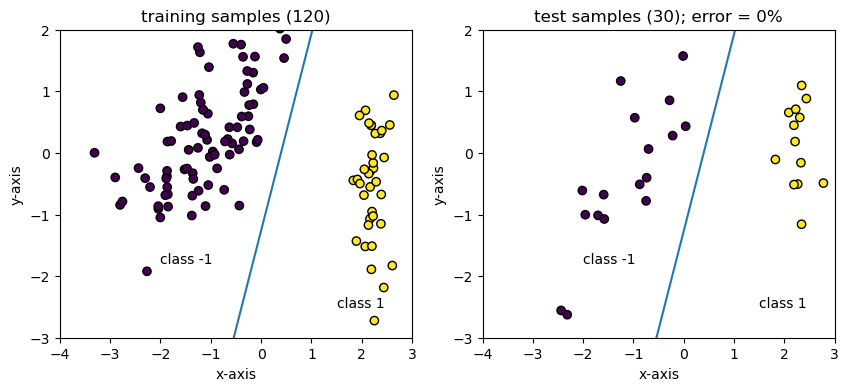

In [16]:
# figure 4 (Perceptron)

f1, axs1 =  plt.subplots(1, 2, figsize= (10,4))

axs1[0].scatter(A2_train[:, 0], A2_train[:, 1], c =  C2[:, 0:120], marker = 'o', edgecolors='black')
axs1[0].set_ylabel('y-axis')
axs1[0].set_xlabel('x-axis')
axs1[0].set_title('training samples (120)')
axs1[0].set_xlim([-4, 3])
axs1[0].set_ylim([-3, 2]);
axs1[0].plot(h2, h3)
axs1[0].annotate('class -1',xy=(2, 1),xytext=(-2,-1.8));
axs1[0].annotate('class 1',xy=(-1,-1),xytext=(1.5,-2.5));

axs1[1].scatter(A2_test[:, 0], A2_test[:, 1], c =  C2_test, marker = 'o', edgecolors='black')
axs1[1].set_ylabel('y-axis')
axs1[1].set_xlabel('x-axis')
axs1[1].set_title('test samples (30); error = 0%')
axs1[1].set_xlim([-4, 3])
axs1[1].set_ylim([-3, 2]);
axs1[1].plot(h2, h3)
axs1[1].annotate('class -1',xy=(2, 1),xytext=(-2,-1.8));
axs1[1].annotate('class 1',xy=(-1,-1),xytext=(1.5,-2.5));

#plt.savefig('fig 60.4.pdf')

(Figure 60.4) The plots show $120$ data points used for training ($left$) and $30$ data points used for testing ($right$). The separating line is obtained by  running the perceptron algorithm (60.27a)--(60.27b) five times over the training data.

We use $120$ samples to train the perceptron classifier by running five passes over the  data: 

$
\widehat{\gamma}(n) = h_n^T w_{n-1} \\
 w_n=w_{n-1}+{\gamma}(n)h_{n},\;\;\textnormal{if}\;\; {\gamma}(n)  \widehat{\gamma}(n)
\leq 0\
$

During each pass of the algorithm, the data $\{{\gamma}(n),h_n\}$ is randomly reshuffled and the algorithm is rerun starting from the weight iterate obtained at the end of the previous pass. The line in the figure shows the separating curve obtained in this manner with parameters (after undoing the extension (60.20):

$
w^{\star}=\begin{bmatrix}   2.3494\\
-0.4372\end{bmatrix},\;\;\;\;\theta^{\star} = 2.0
$

It is seen that the separation curve is able to classify all test vectors and leads to  a $0\%$ empirical error rate.

## Example 60.2 ( Binary classification using the pocket perceptron)

Figure 60.6 illustrates the behavior of the pocket algorithm on training samples that are not linearly separable. The data arises from the dimensionally reduced iris dataset from Example 57.4; we denoted the two-dimensional reduced feature vectors by the notation $h_n'$ in that example. We denote them by $h_n$ here. We consider the situation involving three classes shown in the top plot of Fig. 57.5, and extract the data corresponding to classes r = 1 (versicolor) and r = 2 (virginica) - see, for example, the bottom rightmost plot in Fig. 59.9. We denote these two classes by $\gamma(n) \in {\pm1}$. There are a total of 100 data samples; we select 80 samples for training and 20 samples for testing.

We use the 80 samples to train the traditional perceptron classifier (60.26) and the pocket perceptron classifier (60.45), both under extensions (60.20). In each case, we run five passes of the algorithm over the training data using random reshuffling. The lines in Fig. 60.6 show the separating curves obtained in this manner with parameters

$
w^\star = \begin{bmatrix} 4.2001 \\ -0.4662 \end{bmatrix} \;\;\; 
\textnormal{, } \theta^\star = -5.0 \;\;\;
\textnormal{(traditional perceptron)}
$

$
w^\star = \begin{bmatrix} 3.9984 \\ -1.6366 \end{bmatrix} \;\;\; 
\textnormal{, } \theta^\star = -5.0 \;\;\;
\textnormal{(pocket perceptron)}
$

The resulting empirical error rates on the test data are 20% for perceptron (4 misclassifications in 20 test samples) and 10% for pocket perceptron (2 misclassification in 20 test samples). The empirical error rates over the training data are 16.25% and 10% respectively.

In [39]:
# Non-linearly separable data

data = scipy.io.loadmat('./data/iris_data_feature_dimension_reduced.mat') # loads normalized Iris features reduced to dimension 2x1, classes 0,1,2
labels2 = data['labels2']
labels = labels2 # this column contains the label variables: 0,1,2
features = data['A2'] # feature vectors in row form of size 2x1 each
Nt = 150

m = 0 # separating training data from classes 1 and 2 (these are hardly linearly separable)
B4 = np.array([])

for n in range(Nt):
    if labels[0][n] == 1:
        if B4.shape[0] == 0:
            B4 = np.append(B4, np.concatenate([features[n,:], np.array([1])])) #  feature matrix denoted by B4 plus label in last column
        else:
            B4 = np.vstack((B4, np.concatenate([features[n,:], np.array([1])])))
        
        m = m + 1
        
    if labels[0][n] == 2:
        if B4.shape[0] == 0:
            B4 = np.append(B4, np.concatenate([features[n,:], np.array([-1])]))
        else:
            B4 = np.vstack((B4, np.concatenate([features[n,:], np.array([-1])])))
        
        m = m + 1

# each row of B4 contains 2x1 features followed by +-1 label for
# nonlinearly separable data from Iris classes 1 and 2

# running Perceptron and pocket Perceptron
  
N = np.max([B4.shape]) # total number of data points
N_test = np.fix(0.2*N) # number of test data separated for testing (20%)
B4_train = B4[0:int(N-N_test), :] 
B4_test = B4[int(N-N_test)::, :]

C4_train = B4[0:int(N-N_test), 2] 
C4_test = B4[int(N-N_test)::, 2]

N_train = np.max(B4_train.shape)

print("N")
print(N)

print("N_train")
print(N_train)

print("N_test")
print(int(N_test))


N
100
N_train
80
N_test
20


In [40]:
w = np.zeros((3,1)) # we extend w from two dimensions to three; its leading entry is interpreted as -theta
wp = np.zeros((3,1)) # pocket variable
Rp = 1

number_of_passes = 5

for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = np.array([1, B4_train[P[n], 0:2][0], B4_train[P[n], 0:2][1]]) # feature vector (it is a row here and extended by adding one)
        gamma = B4_train[P[n], 2] # its class
        gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
        if gamma*gamma_hat <= 0:
            w = w + mu*gamma*h.reshape(-1, 1)

        N_w = 0 # number of errors
        for m in range(N_train):
            h_poc = np.array([1, B4_train[P[m], 0:2][0], B4_train[P[m], 0:2][1]]) #  feature vector (it is a row here and extended by adding one)
            gamma_poc = B4_train[P[m], 2] # its class
            gamma_hat_poc = np.matmul(h_poc.reshape(1, -1), w)[0][0]
            if gamma_poc*gamma_hat_poc <= 0:
                N_w = N_w + 1
                
        if (N_w/N_train) < Rp:
            wp = w
            Rp = N_w/N_train

            
# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
 
k = 0
h2a = np.zeros((np.arange(-3, 1.1, 0.1).shape[0],))
h3a = np.zeros((np.arange(-3, 1.1, 0.1).shape[0],))

for z in np.arange(-3, 1.1, 0.1): # line from traditional Perceptron
    h2a[k] = z
    h3a[k] = (-w[0] - h2a[k]*w[1])/w[2]
    k = k + 1

k = 0
h2ab = np.zeros((np.arange(-3, 1.1, 0.1).shape[0],))
h3ab = np.zeros((np.arange(-3, 1.1, 0.1).shape[0],))
for z in np.arange(-3, 1.1, 0.1): # linear from Pocket Perceptron
    h2ab[k] = z
    h3ab[k] = (-wp[0] - h2ab[k]*wp[1])/wp[2]
    k = k + 1
    
    
print('Pocket iterate and traditional Perceptron iterate with leading -theta on top')
print(wp) 
print(w)

error = 0 # error by traditional Perceptron
error_p = 0 # errpr by pocket Perceptron
    
for n in range(int(N_test)):
    h = np.array([1, B4_test[n, 0:2][0], B4_test[n, 0:2][1]]) # feature vector
    gamma = B4_test[n, 2] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
         
            
print('Empirical error rate for traditional Perceptron on TEST data (%):')
print((error/N_test)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TEST data (%):')
print((error_p/N_test)*100) # empirical error
print("error")
print(error)
print("error_p")
print(error_p)

       

Pocket iterate and traditional Perceptron iterate with leading -theta on top
[[ 5.        ]
 [ 4.04290312]
 [-0.48357228]]
[[ 5.        ]
 [ 4.77258953]
 [-0.42286166]]
Empirical error rate for traditional Perceptron on TEST data (%):
10.0
Empirical error rate for pocket Perceptron on TEST data (%):
10.0
error
2
error_p
2


In [41]:
error = 0 # error by traditional Perceptron
error_p = 0 # errpr by pocket Perceptron
    
for n in range(int(N_train)):
    h = np.array([1, B4_train[n, 0:2][0], B4_train[n, 0:2][1]]) # feature vector
    gamma = B4_train[n, 2] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
    

print('Empirical error rate for traditional Perceptron on TRAINING data (%):')
print((error/N_train)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TRAINING data (%):')
print((error_p/N_train)*100)  #  empirical error
print("error")
print(error)
print("error_p")
print(error_p)

print(" number of passes")
print(number_of_passes)


Empirical error rate for traditional Perceptron on TRAINING data (%):
13.750000000000002
Empirical error rate for pocket Perceptron on TRAINING data (%):
11.25
error
11
error_p
9
 number of passes
5


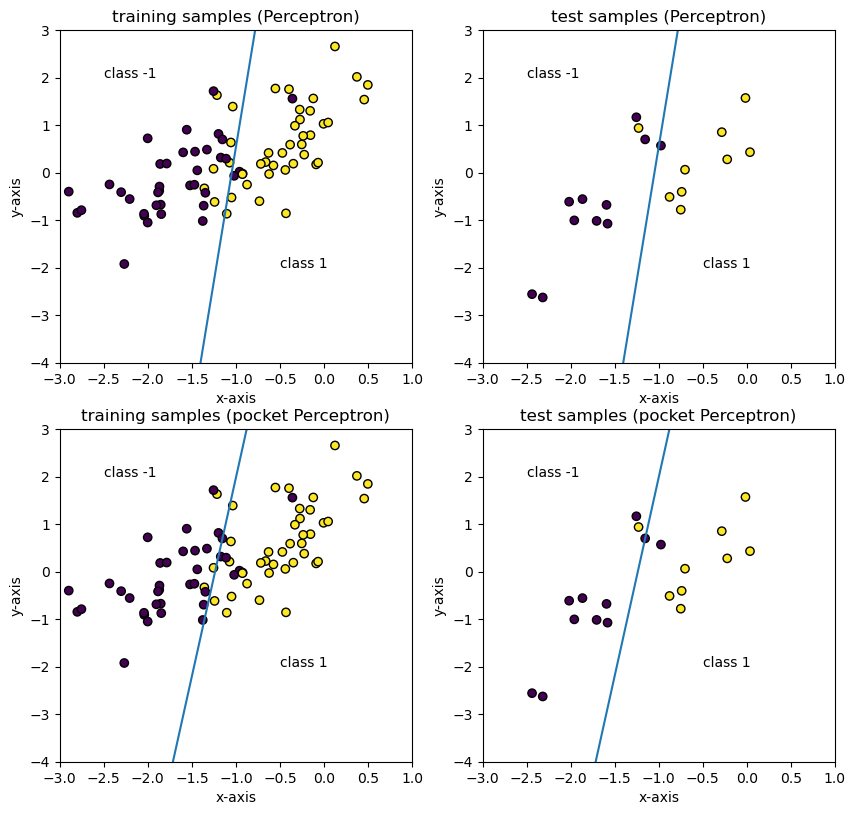

In [43]:
# figure 6 (pocket Perceptron)

f1, axs1 =  plt.subplots(2, 2, figsize=(10,9.5))

axs1[0][0].scatter(B4_train[:, 0], B4_train[:, 1], marker='o', c = C4_train,edgecolors='black')
axs1[0][0].plot(h2a, h3a)
axs1[0][0].set_ylabel('y-axis')
axs1[0][0].set_xlabel('x-axis')
axs1[0][0].set_title('training samples (Perceptron)')
axs1[0][0].set_xlim([-3, 1])
axs1[0][0].set_ylim([-4, 3])
axs1[0][0].annotate('class -1',xy=(-2.5,2),xytext=(-2.5,2));
axs1[0][0].annotate('class 1',xy=(-0.5,-2),xytext=(-0.5,-2));


axs1[0][1].scatter(B4_test[:, 0], B4_test[:, 1], marker='o', c = C4_test,edgecolors='black')
axs1[0][1].plot(h2a, h3a)
axs1[0][1].set_ylabel('y-axis')
axs1[0][1].set_xlabel('x-axis')
axs1[0][1].set_title('test samples (Perceptron)')
axs1[0][1].set_xlim([-3, 1])
axs1[0][1].set_ylim([-4, 3])
axs1[0][1].annotate('class -1',xy=(-2.5,2),xytext=(-2.5,2));
axs1[0][1].annotate('class 1',xy=(-0.5,-2),xytext=(-0.5,-2));


axs1[1][0].scatter(B4_train[:, 0], B4_train[:, 1], marker='o', c = C4_train,edgecolors='black')
axs1[1][0].plot(h2ab, h3ab)
axs1[1][0].set_ylabel('y-axis')
axs1[1][0].set_xlabel('x-axis')
axs1[1][0].set_title('training samples (pocket Perceptron)')
axs1[1][0].set_xlim([-3, 1])
axs1[1][0].set_ylim([-4, 3])
axs1[1][0].annotate('class -1',xy=(-2.5,2),xytext=(-2.5,2));
axs1[1][0].annotate('class 1',xy=(-0.5,-2),xytext=(-0.5,-2));


axs1[1][1].scatter(B4_test[:, 0], B4_test[:, 1], marker='o', c = C4_test,edgecolors='black')
axs1[1][1].plot(h2ab, h3ab)
axs1[1][1].set_ylabel('y-axis')
axs1[1][1].set_xlabel('x-axis')
axs1[1][1].set_title('test samples (pocket Perceptron)')
axs1[1][1].set_xlim([-3, 1])
axs1[1][1].set_ylim([-4, 3])
axs1[1][1].annotate('class -1',xy=(-2.5,2),xytext=(-2.5,2));
axs1[1][1].annotate('class 1',xy=(-0.5,-2),xytext=(-0.5,-2));

#plt.savefig('fig 60.6.pdf')

(Figure 60.6) The plots show 80 training samples and 20 test samples ($top$ $row$), and the resulting separation lines by means of the perceoptron classifier (60.20) and the pocket perceptron classifier (60.45). 

## Example 60.3 (Application to the heart disease data)

We reconsider the dimensionally reduced heart disease dataset from Example 57.4. In particular, we consider the data samples shown in the bottom scatter plot of  Fig. 57.6, where the feature vectors have been reduced to dimension $3$. We denote these features vectors by the notation $\{h_n\}$ in this example (as opposed to $\{h_n'\}$ used in Example 57.4); we also denote their dimension by $M=3$. The data in that figure have been aggregated into two classes: presence of heart disease (which we now assign the label $+1$) and absence of heart disease (which we now assign the label $-1$).


There are a total of $297$ data samples; we select $238$ samples for training and $59$ samples for testing (that amounts to $20\%$ of the total number of samples). We use the data to train the traditional perceptron classifier (60.26) and the pocket perceptron classifier (60.45), both under extensions (60.20).  In each case, we run $50$ passes of the algorithms over the training data using random reshuffling.  The results are shown in Fig. 60.7. The hyperplanes in the figure show the separating curves obtained in this manner with parameters

$
w^{\star}=\begin{bmatrix} 
03.8486\\
0.1409\\2.5030
\end{bmatrix}\;\;\;\;\theta^{\star} = -1.0\;\;\;\;\;\;(\textnormal{traditional perceptron})
$

and

$ 
w^{\star}=\begin{bmatrix} 
05.2289\\
2.6399\\1.0637
\end{bmatrix} \;\;\;\;\theta^{\star} = -1.0\;\;\;\;\;\;(\textnormal{pocket perceptron})
$


The resulting empirical error rates on the test data are $33.90\%$ for perceptron (20 misclassifications in 59 test samples) and $22.03\%$ for pocket perceptron (13 misclassifications in 59 test samples). The empirical error rates over the training data are $20.59\%$ and $13.45\%$, respectively.

<br>
<table style="width: 70%;">
  <caption><b>(Table 60.1) Empirical error rates over test and training data for both cases of thirteen- and three-dimensional feature vectors.
  </b></caption>
    <tr>
    <th>Algorithm</th>
    <th>M</th>
    <th>N</th>
    <th>N train</th>
    <th>N test</th>
    <th>Training error</th>
    <th>Testing error</th>
  </tr>
  <tr>
    <th>perceptron</th>
    <th>13</th>
    <th>297</th>
    <th>238</th>
    <th>59</th>
    <th>17.23%</th>
     <th>27.12%</th>
   </tr>
  <tr>
    <th>pocket perceptron</th>
    <th>13</th>
    <th>297</th>
    <th>238</th>
    <th>59</th>
    <th>11.34%</th>
     <th>17.23%</th>
   </tr>
  <tr>
    <th>perceptron</th>
    <th>3</th>
    <th>297</th>
    <th>238</th>
    <th>59</th>
    <th>20.59%</th>
     <th>30.90%</th>
   </tr>
  <tr>
    <th>pocket perceptron</th>
    <th>3</th>
    <th>297</th>
    <th>238</th>
    <th>59</th>
    <th>13.45%</th>
     <th>22.03%</th>
   </tr>
    
    
</table>
<br>



We repeat the same procedure and apply perceptron and pocket perceptron to the heart disease dataset without reducing the dimension of the feature space. Recall that originally each feature consists of $M=13$ attributes. We center the feature vectors around their mean and scale their variance to 1, as was described earlier in the preprocessing steps for  principal component analysis (PCA) in (57.6). We subsequently apply the perceptron and pocket perceptron to $238$ training samples from this set and test the performance on $59$ other samples. We also test the performance on the training samples. Table 60.1 summarizes the empirical error rates obtained for both the reduced and full-feature vectors. The symbols $N_{train}$ and $N_{test}$ refer to the number of samples used for training and testing.

In [115]:
print('HEART-DISEASE DATA....')


HEART-DISEASE DATA....


In [121]:
# Running Perceptron on Heart Disease Data with features reduced to 3 dimensions

data = scipy.io.loadmat('./data/heart_disease_data_feature_dimension_reduced_two_labels.mat')

labelsz = data['labelsz']
C5 = labelsz # this column contains the label variables gamma; +1 and -1
Az = data['Az']
B5 = np.concatenate([Az, C5], axis = 1) # each row contains 3 attributes followed by +-1 label

# running Perceptron and pocket Perceptron

N = np.max([B5.shape]) # total number of data points
N_test = np.fix(0.2*N) # number of test data separated for testing (20%)
B5_train = B5[0:int(N-N_test), :] 
B5_test = B5[int(N-N_test)::, :]

C5_train = B5[0:int(N-N_test), 3] 
C5_test = B5[int(N-N_test)::, 3]

N_train = np.max(B5_train.shape)

print('number of samples, training samples, testing samples')

print("N")
print(N)

print("N_train")
print(N_train)

print("N_test")
print(N_test)



number of samples, training samples, testing samples
N
297
N_train
238
N_test
59.0


In [122]:
w = np.zeros((4,1)) # we extend w from three dimensions to four; its leading entry is interpreted as -theta
wp = np.zeros((4,1)) # pocket variable
Rp = 1
mu = 1

number_of_passes = 50

for p in range(number_of_passes):
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = np.array([1, B5_train[P[n], 0:3][0], B5_train[P[n], 0:3][1], B5_train[P[n], 0:3][2]]) # feature vector (it is a row here and extended by adding one)
        gamma = B5_train[P[n], 3] # its class
        gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
        if gamma*gamma_hat <= 0:
            w = w + mu*gamma*h.reshape(-1, 1)

        N_w = 0 # number of errors
        for m in range(N_train):
            h_poc = np.array([1, B5_train[P[m], 0:3][0], B5_train[P[m], 0:3][1], B5_train[P[m], 0:3][2]]) # feature
            gamma_poc = B5_train[P[m], 3] # its class
            gamma_hat_poc = np.matmul(h_poc.reshape(1, -1), w)[0][0]
            if gamma_poc*gamma_hat_poc <= 0:
                N_w = N_w + 1
                
        if (N_w/N_train) < Rp:
            wp = w
            Rp = N_w/N_train
            
            
print('Pocket iterate and traditional Perceptron iterate with leading -theta on top')
print(wp) 
print(w)
    



Pocket iterate and traditional Perceptron iterate with leading -theta on top
[[2.        ]
 [3.98221044]
 [1.11951062]
 [0.68809842]]
[[3.        ]
 [4.80104752]
 [1.77806516]
 [3.43229554]]


In [123]:
# let w = [-theta w2 w3 w4]',  h = [ 1 h2 h3 h4]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 + h4 w_4 - theta = 0

k = 0
h2a = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))
h3a = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))
h4a = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))
h2ab = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))
h3ab = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))
h4ab = np.zeros((np.arange(-5, 3.05, 0.05).shape[0]*np.arange(-4, 4.05, 0.05).shape[0],))


for x in np.arange(-5, 3.05, 0.05): # line from traditional and pocket Perceptron
    for y in np.arange(-4, 4.05, 0.05):
        h2a[k] = x # traditional
        h3a[k] = y
        h4a[k] = (-w[0] - h2a[k]*w[1] - h3a[k]*w[2])/w[3]
        
        h2ab[k] = x # pocket
        h3ab[k] = y
        h4ab[k] = (-wp[0] - h2ab[k]*wp[1] - h3ab[k]*wp[2])/wp[3]

        k = k + 1

L = np.max(h2a.shape)

error = 0 # error by traditional Perceptron
error_p = 0 # errpr by pocket Perceptron
    
for n in range(int(N_test)):
    h = np.array([1, B5_test[n, 0:3][0], B5_test[n, 0:3][1], B5_test[n, 0:3][2]]) # feature vector
    gamma = B5_test[n, 3] # its class 
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
         
            
print('Empirical error rate for traditional Perceptron on TEST data (%):')
print((error/N_test)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TEST data (%):')
print((error_p/N_test)*100) # empirical error
print('number of errors: traditional and pocket')
print(error)
print(error_p)



Empirical error rate for traditional Perceptron on TEST data (%):
27.11864406779661
Empirical error rate for pocket Perceptron on TEST data (%):
28.8135593220339
number of errors: traditional and pocket
16
17


In [124]:
error = 0 # error by traditional Perceptron
error_p = 0 # errpr by pocket Perceptron
    
for n in range(int(N_train)):
    h = np.array([1, B5_train[n, 0:3][0], B5_train[n, 0:3][1], B5_train[n, 0:3][2]]) # feature vector
    gamma = B5_train[n, 3] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
    

print('Empirical error rate for traditional Perceptron on TRAINING data (%):')
print((error/N_train)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TRAINING data (%):')
print((error_p/N_train)*100) 
print(error)
print(error_p)

print(" number of passes")
print(number_of_passes)



Empirical error rate for traditional Perceptron on TRAINING data (%):
20.168067226890756
Empirical error rate for pocket Perceptron on TRAINING data (%):
13.445378151260504
48
32
 number of passes
50


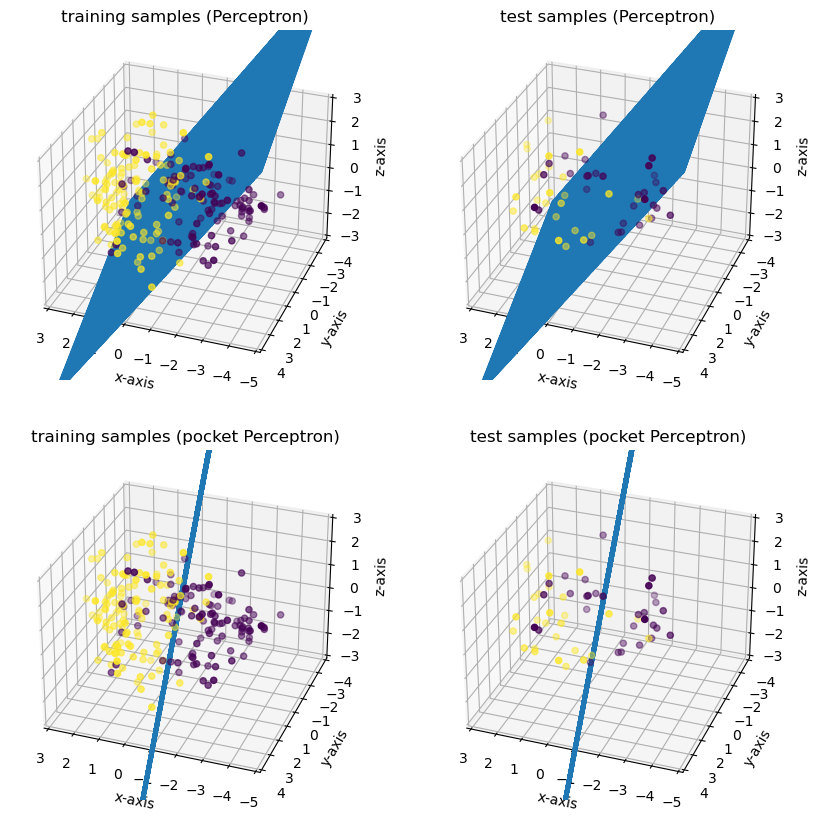

In [125]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(B5_train[:, 0], B5_train[:, 1], B5_train[:, 2], marker='o', c = C5_train)
ax.plot(h2a, h3a, h4a)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('training samples (Perceptron)')
ax.set_xlim([-5, 3])
ax.set_ylim([-4, 4])
ax.set_zlim([-3, 3])
ax.view_init(30, 110)


ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(B5_test[:, 0], B5_test[:, 1], B5_test[:, 2], marker='o', c = C5_test)
ax.plot(h2a, h3a, h4a)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('test samples (Perceptron)')
ax.set_xlim([-5, 3])
ax.set_ylim([-4, 4])
ax.set_zlim([-3, 3])
ax.view_init(30, 110)


ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(B5_train[:, 0], B5_train[:, 1], B5_train[:, 2], marker='o', c = C5_train)
ax.plot(h2ab, h3ab, h4ab)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('training samples (pocket Perceptron)')
ax.set_xlim([-5, 3])
ax.set_ylim([-4, 4])
ax.set_zlim([-3, 3])
ax.view_init(30, 110)


ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(B5_test[:, 0], B5_test[:, 1], B5_test[:, 2], marker='o', c = C5_test)
ax.plot(h2ab, h3ab, h4ab)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('test samples (pocket Perceptron)')
ax.set_xlim([-5, 3])
ax.set_ylim([-4, 4])
ax.set_zlim([-3, 3])
ax.view_init(30, 110)

plt.savefig('fig 60.7.pdf')

(Figure 60.7) The plots show $238$ training samples and $59$ test samples in three-dimensional space (top row), and the resulting separation curves by means of the perceptron classifier (60.26) and the pocket perceptron classifier (60.45). 

In [132]:
print('HEART-DISEASE NORMALIZED DATA IN FULL DIMENSION....')


HEART-DISEASE NORMALIZED DATA IN FULL DIMENSION....


In [136]:
data = scipy.io.loadmat('./data/heart_disease_data_normalized.mat') # loads normalized heart-disease features reduced to dimension 3x1

labelsp = data['labelsp'][0]
Cp = labelsp # this column contains the label variables 0 and (1,2,3)
Ap = data['Ap']

N = np.max(Cp.shape)

for n in range(N): # change all labels to + 1 and -1
    if Cp[n] != 0:
        Cp[n] = 1 # has heart disease
        
    else:
        Cp[n] = -1 # no heart disease
        
Bp = np.concatenate([Ap, Cp.reshape(-1, 1)], axis = 1) # each row contains 13 attributes followed by +-1 label
  
M = np.min(Ap.shape)
    
# running Perceptron and pocket Perceptron

N = np.max([B5.shape]) # total number of data points
N_test = np.fix(0.2*N) # number of test data separated for testing (20%)
Bp_train = Bp[0:int(N-N_test), :] 
Bp_test = Bp[int(N-N_test)::, :]

Cp_train = Bp[0:int(N-N_test), 3] 
Cp_test = Bp[int(N-N_test)::, 3]

N_train = np.max(Bp_train.shape)

w = np.zeros((M+1,1)) # we extend w from M dimensions to M+1; its leading entry is interpreted as -theta
wp = np.zeros((M+1,1)) # pocket variable
Rp = 1
mu = 1

number_of_passes = 50

for p in range(number_of_passes):
    print(p)
    P = np.random.permutation(N_train)
    for n in range(N_train):
        h = h = np.concatenate([np.array([1]), Bp_train[P[n], 0:M][:]]) # feature vector (it is a row here and extended by adding one)
        gamma = Bp_train[P[n], M] # its class
        gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
        if gamma*gamma_hat <= 0:
            w = w + mu*gamma*h.reshape(-1, 1)

        N_w = 0 # number of errors
        for m in range(N_train):
            h_poc = np.concatenate([np.array([1]), Bp_train[P[n], 0:M][:]]) # feature vector (it is a row here and extended by adding one)
            gamma_poc = Bp_train[P[m], 3] # its class
            gamma_hat_poc = np.matmul(h_poc.reshape(1, -1), w)[0][0]
            if gamma_poc*gamma_hat_poc <= 0:
                N_w = N_w + 1
                
        if (N_w/N_train) < Rp:
            wp = w
            Rp = N_w/N_train
            


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [137]:
error = 0 # error by traditional Perceptron
error_p = 0 # error by pocket Perceptron
    
for n in range(int(N_test)):
    h = np.concatenate([np.array([1]), Bp_test[n, 0:M][:]]) # feature vector
    gamma = Bp_test[n, M] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
         
            
print('Empirical error rate for traditional Perceptron on TEST data (%):')
print((error/N_test)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TEST data (%):')
print((error_p/N_test)*100) # empirical error
print('number of errors: traditional and pocket')
print(error)
print(error_p)



Empirical error rate for traditional Perceptron on TEST data (%):
20.33898305084746
Empirical error rate for pocket Perceptron on TEST data (%):
37.28813559322034
number of errors: traditional and pocket
12
22


In [138]:
error = 0 # error by traditional Perceptron
error_p = 0 # errpr by pocket Perceptron
    
for n in range(int(N_train)):
    h = np.concatenate([np.array([1]), Bp_train[n, 0:M][:]]) # feature vector
    gamma = Bp_train[n, M] # its class
    gamma_hat = np.matmul(h.reshape(1, -1), w)[0][0]
    gamma_hat_poc = np.matmul(h.reshape(1, -1), wp)[0][0] # pocket
    if gamma*gamma_hat <= 0:
        error = error + 1
    if gamma*gamma_hat_poc <= 0:
        error_p = error_p + 1
    
         
            
print('Empirical error rate for traditional Perceptron on TRAINING data (%):')
print((error/N_train)*100) # empirical error

print('Empirical error rate for pocket Perceptron on TRAINING data (%):')
print((error_p/N_train)*100) # emperical error

print('number of errors: traditional and pocket')
print(error)
print(error_p)

print(" number of passes")
print(number_of_passes)



Empirical error rate for traditional Perceptron on TRAINING data (%):
20.168067226890756
Empirical error rate for pocket Perceptron on TRAINING data (%):
31.092436974789916
number of errors: traditional and pocket
48
74
 number of passes
50
